# Inspect Processed Subdirectories

#### Updated: Dec 15, 2022

#  

Create methods to systematically inspect processed subdirectories, for quality and subsequent error analysis.

In [1]:
import pandas as pd
import numpy as np
import os
import random
from random import randrange
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
logDir = '//scientific/L-MP-Data/Massive files/Python/rnaidoo/Alouette_I/'
imageDir = 'U:/Data_Science/Projects_data/Alouette_I/04_processed/'
resultDir = 'U:/Data_Science/Projects_data/Alouette_I/05_result/'

#  

#### Functions:

In [3]:
def inspect_ionograms(roll, subdirectory, sample_list, imageDir, resultDir):
    
    mapped_coords_list = os.listdir(resultDir + 'mapped_coords/' + roll + '/' + subdirectory + '/')
    
    for image_fn in sample_list:
        print(image_fn)
        image_fn_ = image_fn.replace('.png', '')

        f, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1.2],}, figsize=(20,5))

        for mapped_coord_fn in mapped_coords_list:
            if '_' + image_fn_ + '.npy' in mapped_coord_fn:
                print(mapped_coord_fn)
                arr_load = np.load(resultDir + 'mapped_coords/' + roll + '/' + subdirectory + '/' + mapped_coord_fn)
                print(arr_load.shape)

                df_plot = pd.DataFrame({
                'f': arr_load[:, 0],
                'depth': arr_load[:, 1]
                })
                df_plot['depth_plot'] = -1*df_plot['depth']

                axs[0].scatter(df_plot['f'], df_plot['depth_plot'], 1, color='black')
                axs[0].set(xlabel='frequency (MHz)', ylabel='depth (km)')

        img = mpimg.imread(imageDir + roll + '/' + subdirectory + '/' + image_fn)
        axs[1].imshow(img)
        axs[1].set(xticks=[], yticks=[])

        plt.show()
        print('')
        print('')

#  

#### Plot mapped coords for sample of images in random subdirectory:

In [4]:
df_process_log = pd.read_csv(logDir + 'process_log.csv')
print(len(df_process_log))
subdir_ids_list = df_process_log['subdir_id'].unique()
df_process_log.head()

886


Roll Subdirectory  Images_processed  Images_dot  Images_num  \
0   R014207975       1130-B               391           0         381   
1   R014207949      2119-5B               315           0         296   
2  R014207978F          352               424         401           3   
3   R014207821     3319-15A               302           0         220   
4   R014207946      1839-1B               314           1         291   

   Images_loss  Images_outlier  Process_time Process_timestamp User  \
0            2               8    663.214900           28:29.2  Rav   
1            4              15    938.326423           44:20.4  Rav   
2            7              13    386.769271           50:57.0  Rav   
3           73               9    450.319535           58:35.3  Rav   
4            7              15    577.585844           08:21.0  Rav   

             subdir_id  
0    R014207975_1130-B  
1   R014207949_2119-5B  
2      R014207978F_352  
3  R014207821_3319-15A  
4   R014207946_1839-1B

Select random subdirectory:

In [5]:
subdir_id = subdir_ids_list[randrange(len(subdir_ids_list))]
parts = subdir_id.split('_')
roll = parts[0]
subdirectory = parts[1]
print(roll)
print(subdirectory)

R014207940F
396


Draw random sample of images from subdirectory, and inspect:

In [6]:
images_list = os.listdir(imageDir + roll + '/' + subdirectory + '/')
sample_list = random.sample(images_list, 10)
sample_list

['Image0117.png',
 'Image0190.png',
 'Image0303.png',
 'Image0396.png',
 'Image0225.png',
 'Image0069.png',
 'Image0193.png',
 'Image0399.png',
 'Image0214.png',
 'Image0151.png']

Image0117.png
mapped_coords-R014207940F_396_Image0117.npy
(56960, 2)


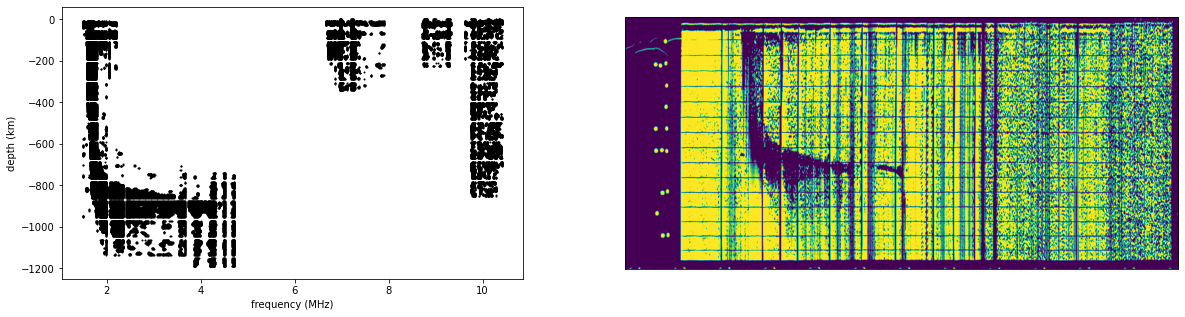



Image0190.png


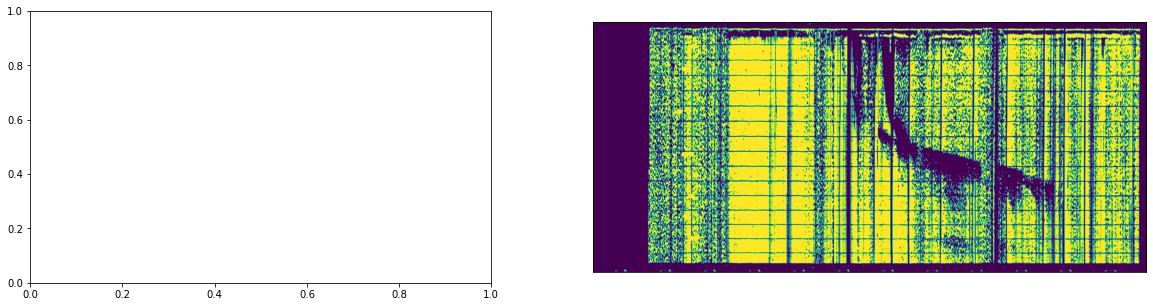



Image0303.png


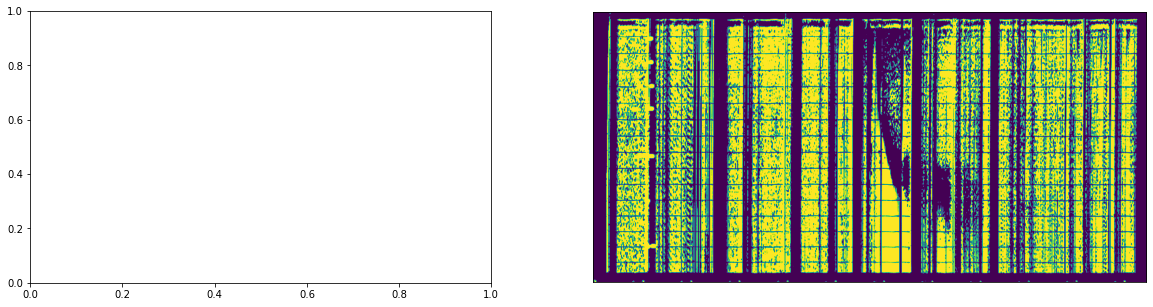



Image0396.png
mapped_coords-R014207940F_396_Image0396.npy
(75887, 2)


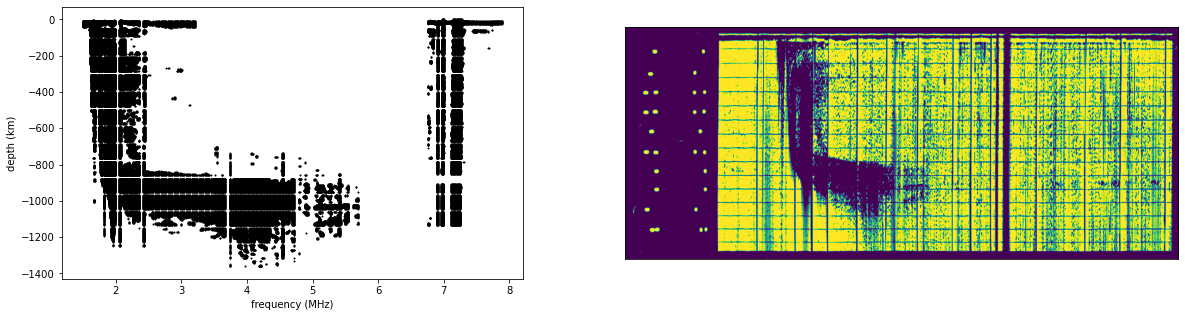



Image0225.png
mapped_coords-R014207940F_396_Image0225.npy
(42161, 2)


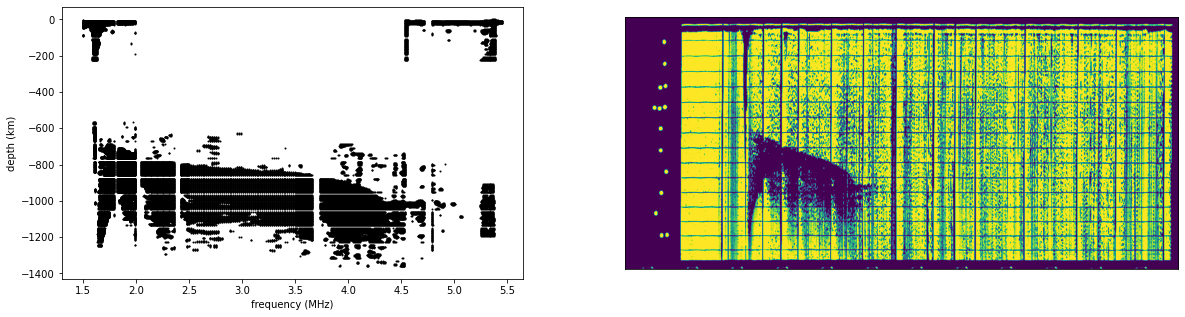



Image0069.png
mapped_coords-R014207940F_396_Image0069.npy
(39378, 2)


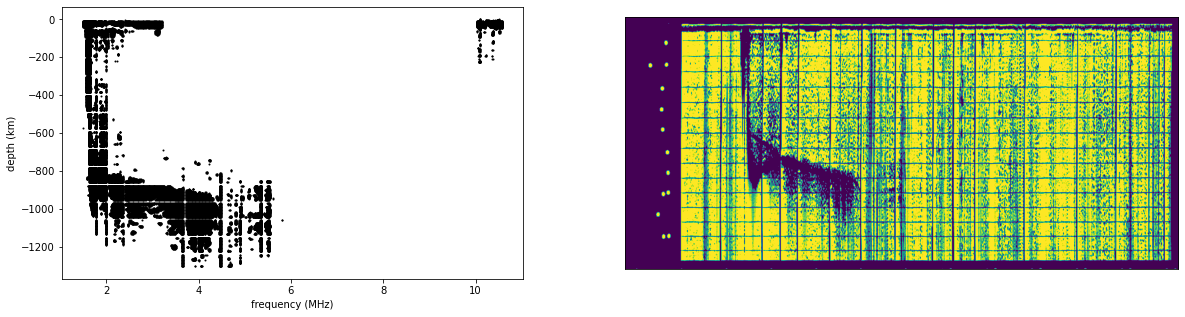



Image0193.png
mapped_coords-R014207940F_396_Image0193.npy
(65098, 2)


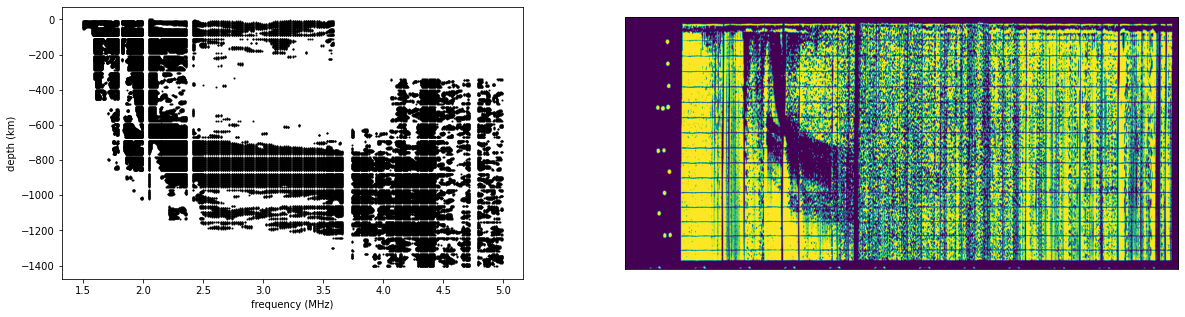



Image0399.png
mapped_coords-R014207940F_396_Image0399.npy
(58326, 2)


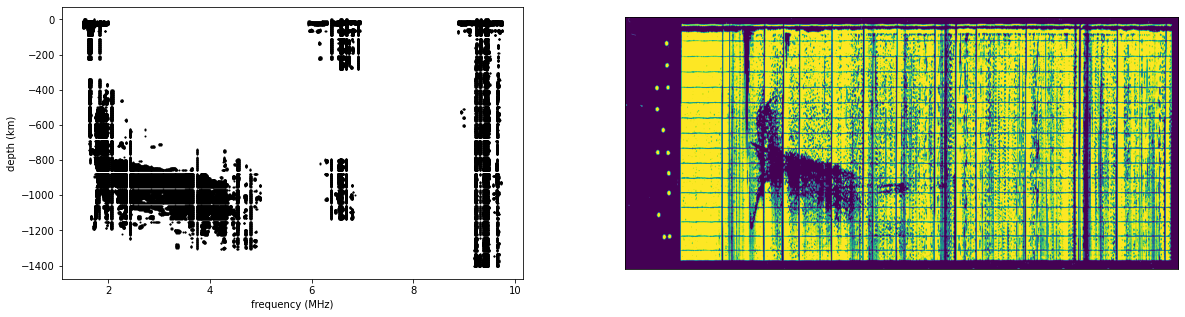



Image0214.png
mapped_coords-R014207940F_396_Image0214.npy
(57179, 2)


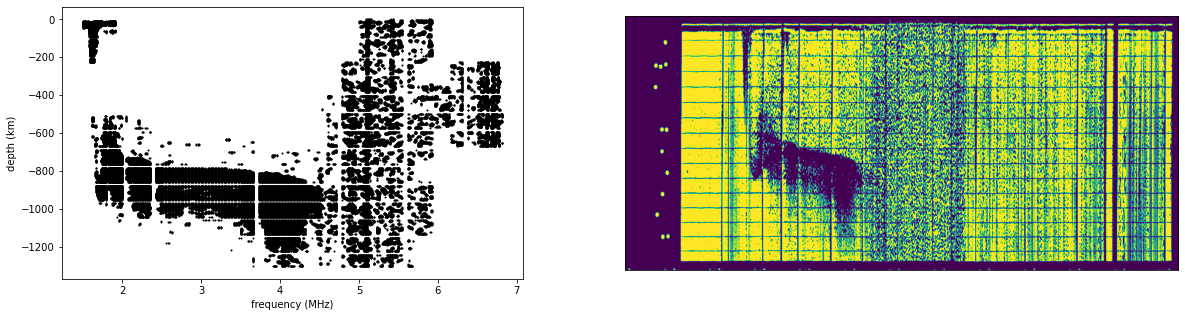



Image0151.png
mapped_coords-R014207940F_396_Image0151.npy
(58998, 2)


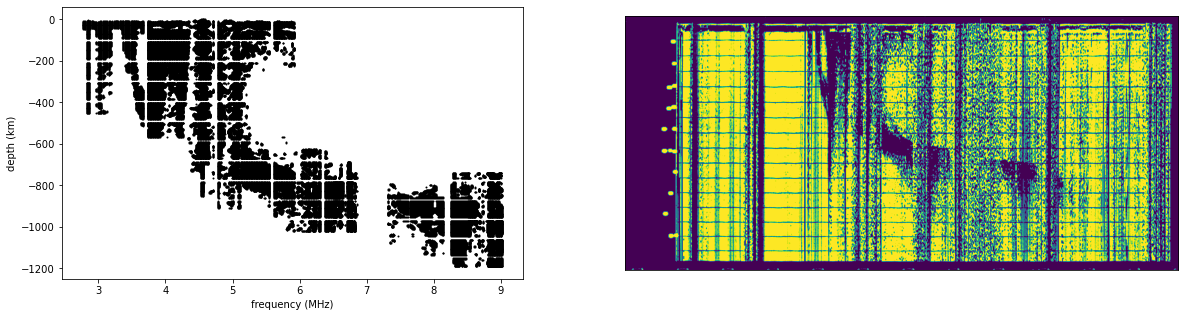

In [7]:
inspect_ionograms(roll=roll, subdirectory=subdirectory, sample_list=sample_list, imageDir=imageDir, resultDir=resultDir)

#  

#### Inpsect high-loss subdirectories:

In [18]:
df1 = df_process_log.sort_values('Images_loss', ascending=True).reset_index(drop=True)
df1.head(20)

Roll Subdirectory  Images_processed  Images_dot  Images_num  \
0   R014207815      3495-8A               298           0         292   
1   R014207824     3174-14A               308           0         304   
2   R014207949      2109-1A                 0           0           0   
3   R014207948      1705-5A               336           0         306   
4   R014207960      2545-5B               347           0         335   
5   R014207821     3320-15A               325           0         317   
6   R014207832      3638-5A               271           0         266   
7   R014207953     2665-15B               309           0         278   
8   R014207844     2898-43B               315           0         307   
9   R014207964     1588-12A               323           0         292   
10  R014207938        964-A               296           0         282   
11  R014207939        866-B               387           0         384   
12  R014207974        750-B               406           0         397   
13  R014207844     2894-43B               260           0         254   
14  R014207948       1737-4                 0           0           0   
15  R014207960      2534-8A                 0           0           0   
16  R014207953     2676-13B                21           0           4   
17  R014207958      2769-4A               166           0         153   
18  R014207959      2339-7A               264           0         253   
19  R014207951      2466-8A               306           0         294   

    Images_loss  Images_outlier  Process_time           Process_timestamp  \
0             0               6    513.694463                     52:08.9   
1             0               4    366.565257  2022-12-14 15:11:45.664312   
2             0               0    734.926319  2022-12-14 14:20:05.098020   
3             0              30    666.684176                     33:19.3   
4             0              12    746.198681            2022-12-14 13:35   
5             0               8    384.567995                     13:42.9   
6             0               5    785.882176            2022-12-14 13:09   
7             0              31    433.064462                     18:03.7   
8             0               8    387.761927                     07:09.6   
9             0              31    212.153068                     54:56.1   
10            0              14    306.894436                     47:51.2   
11            0               3    670.441265                     31:48.0   
12            0               9    637.219622                     58:26.4   
13            0               6    336.022140                     08:36.5   
14            0               0     21.709275                     40:18.0   
15            0               0     22.368651                     47:16.1   
16            0              17    580.437788                     06:48.3   
17            0              13    367.220796                     43:26.0   
18            0              11    485.552400                     24:44.3   
19            0              12    348.622509                     30:49.1   

   User            subdir_id  
0   Rav   R014207815_3495-8A  
1   Rav  R014207824_3174-14A  
2   Rav   R014207949_2109-1A  
3   Rav   R014207948_1705-5A  
4   Rav   R014207960_2545-5B  
5   Rav  R014207821_3320-15A  
6   Rav   R014207832_3638-5A  
7   Rav  R014207953_2665-15B  
8   Rav  R014207844_2898-43B  
9   Rav  R014207964_1588-12A  
10  Rav     R014207938_964-A  
11  Rav     R014207939_866-B  
12  Rav     R014207974_750-B  
13  Rav  R014207844_2894-43B  
14  Rav    R014207948_1737-4  
15  Rav   R014207960_2534-8A  
16  Rav  R014207953_2676-13B  
17  Rav   R014207958_2769-4A  
18  Rav   R014207959_2339-7A  
19  Rav   R014207951_2466-8A

R014207815
3495-8A
96.png
mapped_coords-R014207815_3495-8A_96.npy
(32951, 2)


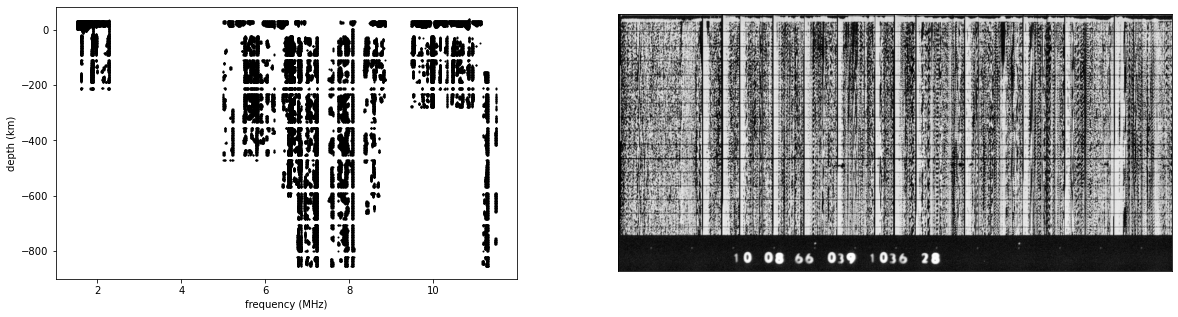



289.png
mapped_coords-R014207815_3495-8A_289.npy
(34494, 2)


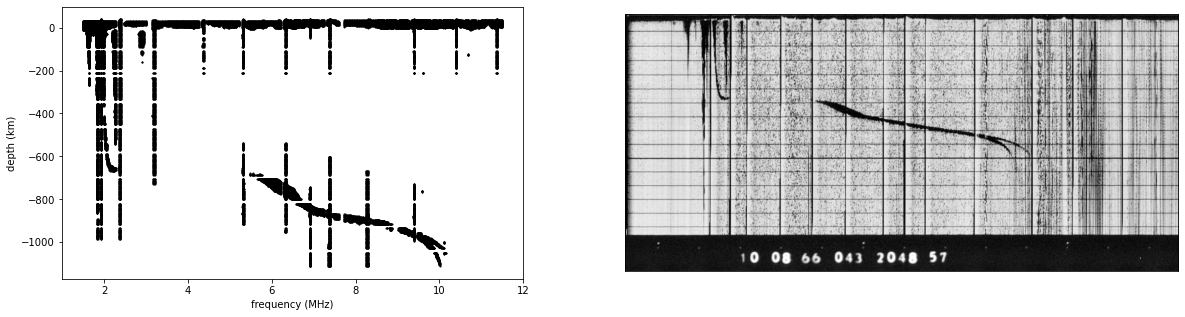



127.png
mapped_coords-R014207815_3495-8A_127.npy
(64388, 2)


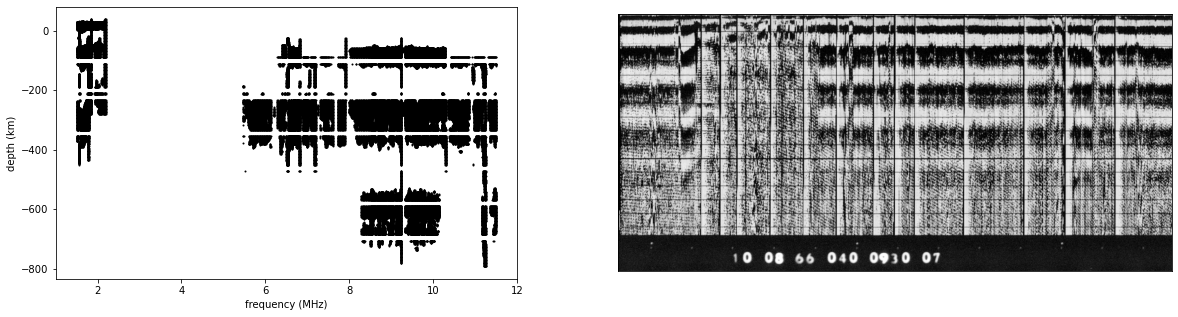



227.png
mapped_coords-R014207815_3495-8A_227.npy
(28878, 2)


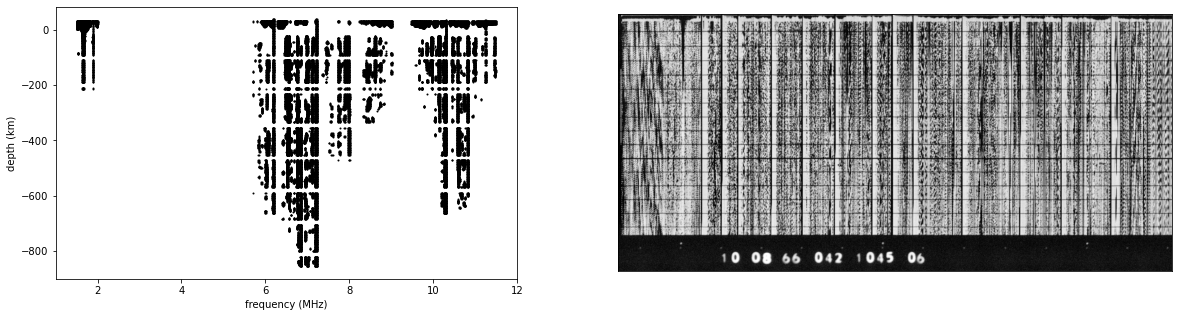



93.png
mapped_coords-R014207815_3495-8A_93.npy
(27504, 2)


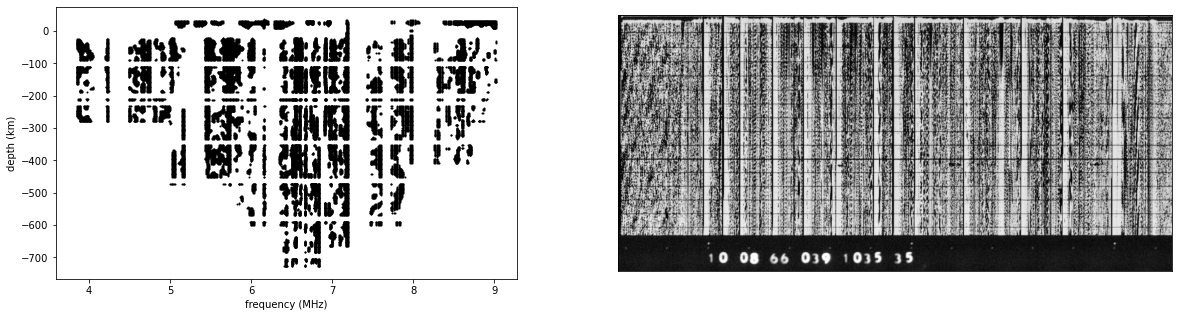



7.png
mapped_coords-R014207815_3495-8A_7.npy
(27466, 2)


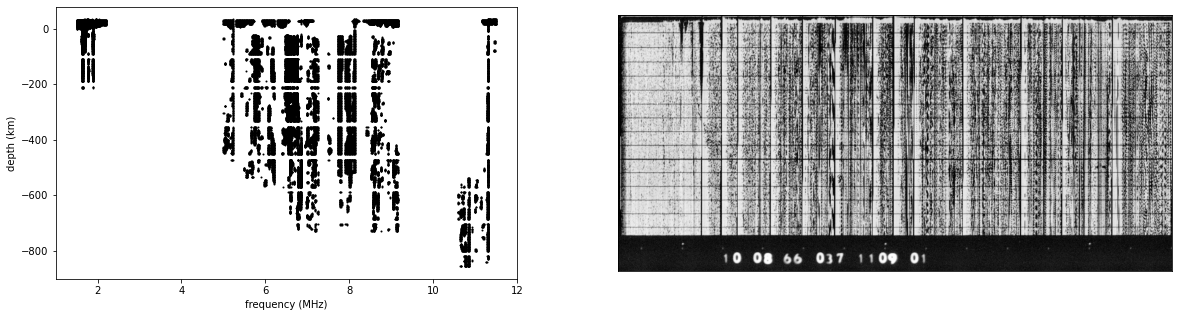



148.png
mapped_coords-R014207815_3495-8A_148.npy
(71526, 2)


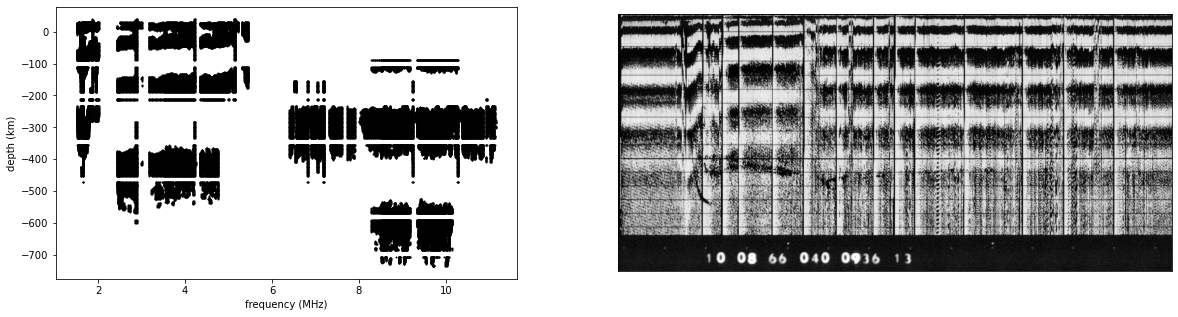



133.png
mapped_coords-R014207815_3495-8A_133.npy
(71229, 2)


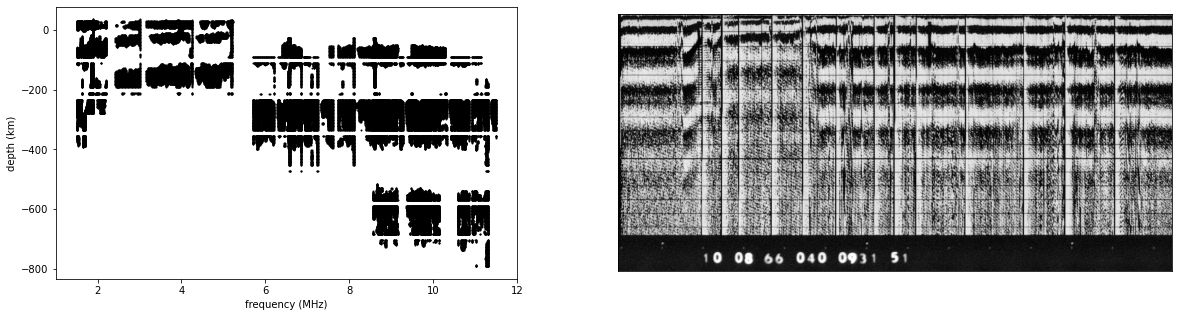



173.png
mapped_coords-R014207815_3495-8A_173.npy
(27658, 2)


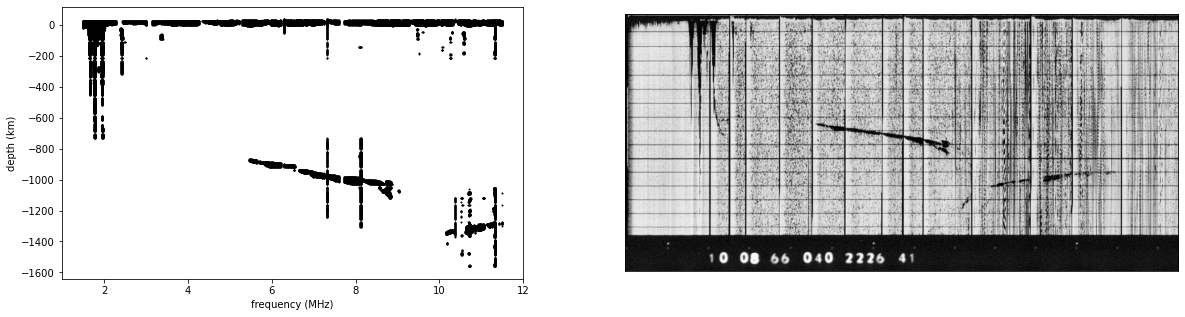



51.png
mapped_coords-R014207815_3495-8A_51.npy
(24436, 2)


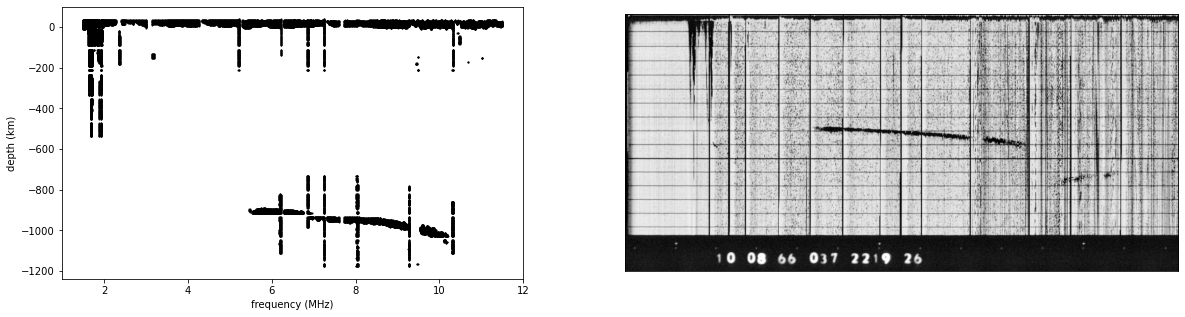

In [19]:
i = 0 #DEMO 0, 14
sample_size = 10

roll = df1['Roll'].iloc[i]
subdirectory = df1['Subdirectory'].iloc[i]
print(roll)
print(subdirectory)
images_list = os.listdir(imageDir + roll + '/' + subdirectory + '/')
sample_list = random.sample(images_list, sample_size)
inspect_ionograms(roll=roll, subdirectory=subdirectory, sample_list=sample_list, imageDir=imageDir, resultDir=resultDir)